In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# خواندن داده

In [2]:
data = pd.read_csv("Original Data/hh_demographic.csv")
data.head()

,AGE_DESC,MARITAL_STATUS_CODE,INCOME_DESC,HOMEOWNER_DESC,HH_COMP_DESC,HOUSEHOLD_SIZE_DESC,KID_CATEGORY_DESC,household_key
0,65+,A,35-49K,Homeowner,2 Adults No Kids,2,None/Unknown,1
1,45-54,A,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown,7
2,25-34,U,25-34K,Unknown,2 Adults Kids,3,1,8
3,25-34,U,75-99K,Homeowner,2 Adults Kids,4,2,13
4,45-54,B,50-74K,Homeowner,Single Female,1,None/Unknown,16


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   AGE_DESC             801 non-null    object
 1   MARITAL_STATUS_CODE  801 non-null    object
 2   INCOME_DESC          801 non-null    object
 3   HOMEOWNER_DESC       801 non-null    object
 4   HH_COMP_DESC         801 non-null    object
 5   HOUSEHOLD_SIZE_DESC  801 non-null    object
 6   KID_CATEGORY_DESC    801 non-null    object
 7   household_key        801 non-null    int64 
dtypes: int64(1), object(7)
memory usage: 50.2+ KB


In [4]:
households = data['household_key'].unique()
households

array([   1,    7,    8,   13,   16,   17,   18,   19,   20,   22,   25,
         27,   31,   39,   40,   42,   43,   46,   48,   49,   52,   55,
         56,   57,   58,   67,   71,   74,   77,   78,   80,   85,   86,
         97,   98,  101,  104,  105,  109,  110,  113,  114,  117,  118,
        119,  121,  123,  127,  131,  133,  134,  136,  139,  149,  155,
        157,  158,  159,  161,  164,  165,  166,  170,  178,  184,  192,
        193,  198,  201,  208,  209,  211,  212,  214,  216,  218,  219,
        220,  221,  222,  230,  232,  235,  239,  242,  243,  248,  249,
        250,  253,  256,  257,  263,  264,  276,  281,  282,  283,  289,
        290,  294,  300,  301,  302,  304,  306,  309,  314,  317,  319,
        321,  324,  325,  329,  332,  334,  346,  350,  351,  353,  354,
        358,  361,  362,  367,  370,  371,  377,  378,  381,  383,  385,
        386,  387,  389,  390,  391,  392,  395,  400,  404,  409,  410,
        411,  412,  413,  417,  418,  426,  428,  4

# ساخت داده جدید

In [5]:
house_data = {}
for house in households:
    tmp = pd.read_csv(f'Data/data_{house}.csv')
    tmp = tmp[tmp['value'] != 0]
    avg = np.average(tmp['value'])
    house_data[house] = avg

In [6]:
len(house_data)

801

In [7]:
new_data = pd.DataFrame(columns=['key', 'age', 'income', 'size', 'kid', 'avg'])

In [8]:
for index, row in data.iterrows():
    key = int(row['household_key'])
    age = int(row['AGE_DESC'][:2])
    income = row['INCOME_DESC'][:2]
    if income == 'Un':
        income = 10
    income = int(income)
    size = int(row['HOUSEHOLD_SIZE_DESC'][:1])
    k = row['KID_CATEGORY_DESC'][:1]
    if k == 'N':
        k = 0
    k = int(k)
    tmp = pd.DataFrame({'key': [key], 'age':[age], 'income':[income], 'size':[size], 'kid':[k], 'avg':[house_data[key]]})
    new_data = new_data.append(tmp)
    
new_data.head()
    

,key,age,income,size,kid,avg
0,1,65,35,2,0,55.514872
0,7,45,50,2,0,57.627966
0,8,25,25,3,1,53.737573
0,13,25,75,4,2,64.979901
0,16,45,50,1,0,16.800222


In [9]:
new_data['age'] = pd.to_numeric(new_data['age'])
new_data['income'] = pd.to_numeric(new_data['income'])
new_data['size'] = pd.to_numeric(new_data['size'])
new_data['kid'] = pd.to_numeric(new_data['kid'])
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 801 entries, 0 to 0
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     801 non-null    object 
 1   age     801 non-null    int64  
 2   income  801 non-null    int64  
 3   size    801 non-null    int64  
 4   kid     801 non-null    int64  
 5   avg     801 non-null    float64
dtypes: float64(1), int64(4), object(1)
memory usage: 43.8+ KB


# Corelation

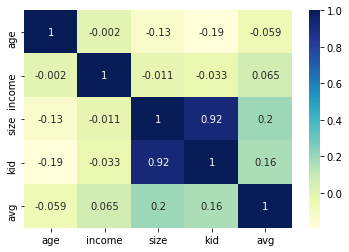

In [10]:
dataplot = sns.heatmap(new_data.corr(), cmap="YlGnBu", annot=True)